<a href="https://colab.research.google.com/github/Zobya/machine-learning-algos-Using-Python/blob/main/svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(40, 2)
(40,)


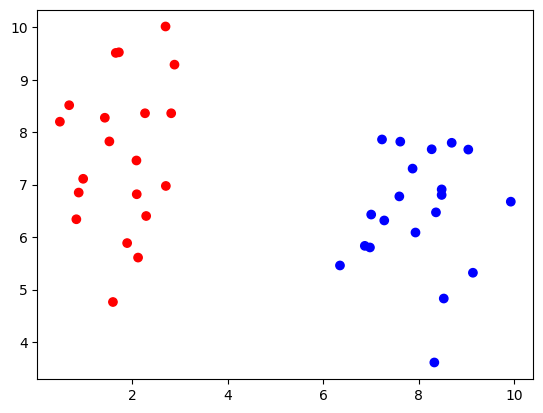

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

#we create 40 different points
X,y=make_blobs(n_samples=40, centers=2, random_state=20)
#fitting the model and not regularising for illustration purposes
hypp= svm.SVC(kernel='linear',C=1) #default hyper parameters c=1.0
hypp.fit(X,y)
print(X.shape)
print(y.shape)

# using colormap
colormap = np.array(['r', 'b'])
x=np.hsplit(X, 2)
plt.scatter(x[0],x[1],c=colormap[y])

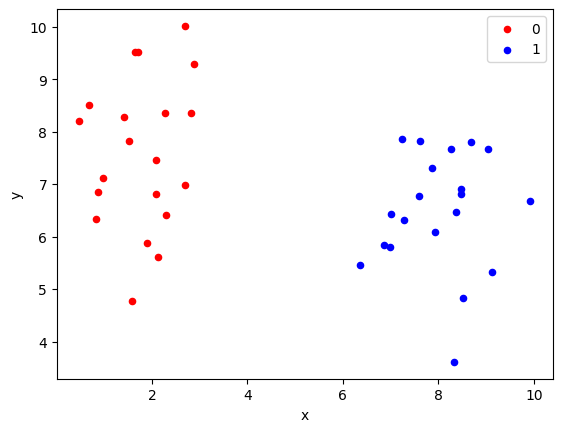

In [ ]:
#displaying data using pandas dataframe, dots colored by class value
from pandas import DataFrame

df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

In [ ]:
#predicting classes for new data
newData = [[4,6],[6,9]]
print(hypp.predict(newData))

[0 1]


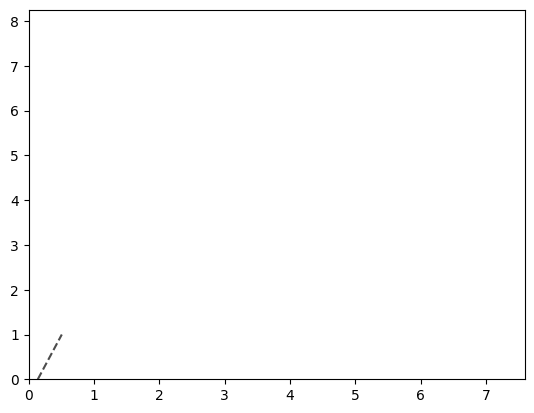

In [ ]:
#plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
#create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1],30)
yy = np.linspace(ylim[0], ylim[1],30)
YY, XX = np.meshgrid(yy,xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = hypp.decision_function(xy).reshape(XX.shape)
#Z generates 3 values and tells if it's support vector to the right, hyperplane or the support vector to the left
#the points have been reshaped to fit on a line(on 3 different lines)
#plotting desicion boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1,0,1], alpha=0.7, linestyles=['--','-','--'])

#plot support vectors
ax.scatter(hypp.support_vectors_[:,0], hypp.support_vectors_[:,1], linewidth=1, facecolors='none')
plt.show()

In [ ]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
# check the shape of X_train and X_test

print(X_train.shape, X_test.shape)


(32, 2) (8, 2)


In [ ]:
print(X_train)
print(X_test)

[[ 2.08607703  7.46086368]
 [ 8.47764867  6.90996676]
 [ 6.34822954  5.46058533]
 [ 7.00192182  6.43079715]
 [ 1.51927726  7.82424385]
 [ 8.68770841  7.79789319]
 [ 7.59114483  6.77649377]
 [ 1.89139437  5.88732584]
 [ 8.52161671  4.83102994]
 [ 7.61095347  7.8201477 ]
 [ 9.03512586  7.66854573]
 [ 2.26571286  8.36068903]
 [ 2.12015254  5.61101265]
 [ 0.48311336  8.19998973]
 [ 1.65359865  9.510461  ]
 [ 2.88274828  9.28705277]
 [ 2.70208537  6.97579352]
 [ 2.69548237 10.01411256]
 [ 1.42412542  8.27524534]
 [ 9.13204399  5.32194764]
 [ 2.28968574  6.40317382]
 [ 0.97059923  7.11190662]
 [ 8.26863909  7.67453856]
 [ 8.32405183  3.6123843 ]
 [ 7.9294032   6.08842852]
 [ 7.86880706  7.3062361 ]
 [ 1.59396992  4.76457177]
 [ 9.92527993  6.67617854]
 [ 0.82767806  6.34128434]
 [ 6.9758391   5.80360444]
 [ 2.8137247   8.36064298]
 [ 1.71842122  9.52190711]]
[[0.67778343 8.51397085]
 [2.09222936 6.81774802]
 [8.35834306 6.47258777]
 [7.27542879 6.31825811]
 [0.87712287 6.84969507]
 [8.477044

In [ ]:
#predicting classes for test data
#Run SVM with default hyperparameters C=1.0 kernel=rbf
# import SVC classifier
from sklearn.svm import SVC


# import metrics to compute accuracy
from sklearn.metrics import accuracy_score


# instantiate classifier with default hyperparameters
svc=SVC()


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
'''Accuracy score in machine learning is an evaluation metric
 that measures the number of correct predictions made by a model
 in relation to the total number of predictions made. We calculate it
 by dividing the number of correct predictions by the total number of predictions'''
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 1.0000


In [ ]:
#Run SVM with linear kernel and C=1.0
# instantiate classifier with linear kernel and C=1.0
linear_svc=SVC(kernel='linear', C=1.0)


# fit classifier to training set
linear_svc.fit(X_train,y_train)


# make predictions on test set
y_pred_test=linear_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score with linear kernel and C=1.0 : 1.0000


In [ ]:
y_pred_train = linear_svc.predict(X_train)
print(y_pred_train)

[0 1 1 1 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 1 0 1 0 0]


In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 1.0000


In [ ]:
#Get support vector indices
support_vector_indices = hypp.support_
print(support_vector_indices)

[33 27 28]


In [ ]:
# Get number of support vectors per class
support_vectors_per_class = hypp.n_support_
print(support_vectors_per_class)

[1 2]


In [ ]:
from matplotlib.font_manager import X11FontDirectories
# Get support vectors themselves
support_vectors = hypp.support_vectors_
Z = hypp.decision_function(X)
print (Z.shape)
Z=Z.reshape(2,20)
print(Z.shape)
X=X.reshape(2,40)
Xn=X[1].reshape(2,20)
print(Xn.shape)
y=y.reshape(2,20)
print(y.shape)

(40,)
(2, 20)
(2, 20)
(2, 20)


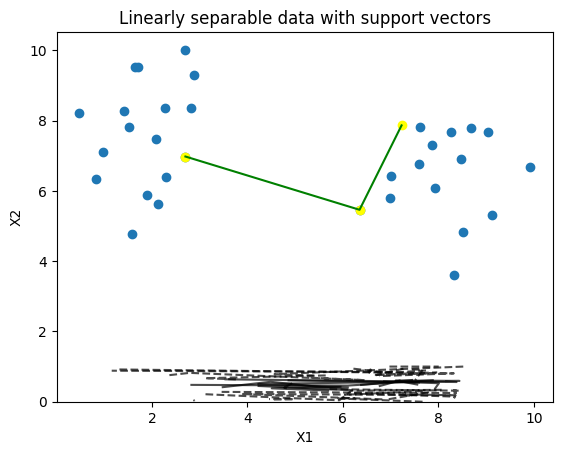

In [ ]:
# Visualize support vectors
plt.scatter(X_train[:,0], X_train[:,1])
plt.scatter(support_vectors[:,0], support_vectors[:,1], color='yellow')
plt.title('Linearly separable data with support vectors')
plt.xlabel('X1')
plt.ylabel('X2')
plt.plot(support_vectors[:,0], support_vectors[:,1], color='green')

plt.contour(Xn, y, Z, colors='k', levels=[-1,0,1], alpha=0.7, linestyles=['--','-','--'])
plt.show()